In [2]:
%matplotlib inline

from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

from skimage.morphology import medial_axis

import cv2 as cv

from skimage.morphology import thin


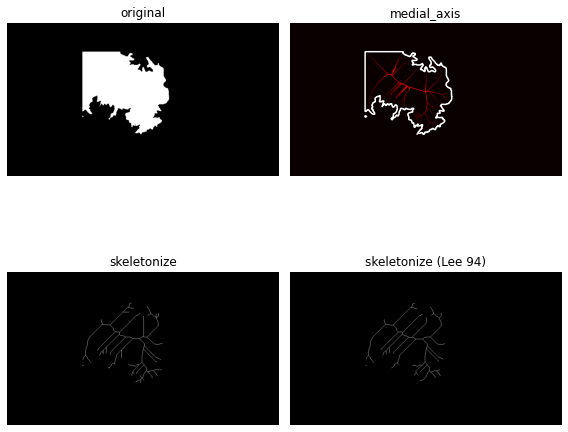

True

In [7]:
# Generate the data
#blobs = data.binary_blobs(200, blob_size_fraction=.2, volume_fraction=.35, seed=1)

#read 3D rbg image as 2D greyscale nparray
blobs = cv.imread(cv.samples.findFile("../testcorner_blackandwhite.png"),0) 
# last parameter 0 = greyscale 1 = color -1 = unchanged 

#convert data from int to np bool 
blobs = blobs > 127

# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(blobs, return_distance=True)

# Compare with other skeletonization algorithms
skeleton = skeletonize(blobs)
skeleton_lee = skeletonize(blobs, method='lee')

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel

fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(blobs, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(dist_on_skel, cmap='hot')
ax[1].contour(blobs, [0.5], colors='w')
ax[1].set_title('medial_axis')
ax[1].axis('off')

ax[2].imshow(skeleton, cmap=plt.cm.gray)
ax[2].set_title('skeletonize')
ax[2].axis('off')

ax[3].imshow(skeleton_lee, cmap=plt.cm.gray)
ax[3].set_title("skeletonize (Lee 94)")
ax[3].axis('off')

fig.tight_layout()
plt.show()

cv.imwrite('lake_medial_axis.png', dist_on_skel * 255)
cv.imwrite('lake_skeleton.png', skeleton * 255)
cv.imwrite('lake_skeleton_lee94.png', skeleton_lee )


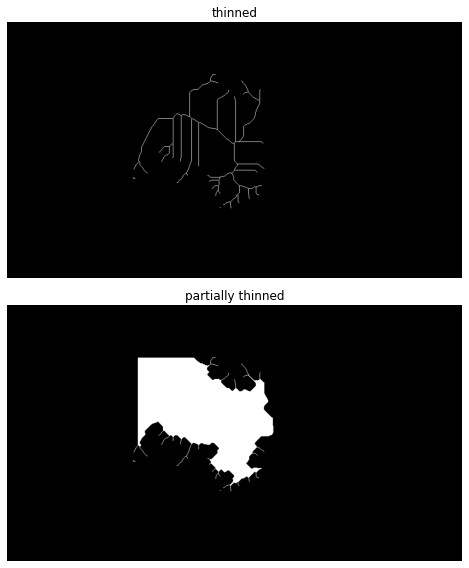

True

In [8]:
thinned = thin(blobs)
thinned_partial = thin(blobs, max_iter=10)

fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True, sharey=True)
#fig, axes = plt.subplots(1, 2)
ax = axes.ravel()


ax[0].imshow(thinned, cmap=plt.cm.gray)
ax[0].set_title('thinned')
ax[0].axis('off')

ax[1].imshow(thinned_partial, cmap=plt.cm.gray)
ax[1].set_title('partially thinned')
ax[1].axis('off')

fig.tight_layout()
plt.show()

cv.imwrite('lake_thinned.png', thinned * 255)
cv.imwrite('lake_thinned_partial.png', thinned_partial * 255)




